• May 1 (Mon) : Submit Group members by e-mail (lee.eunk@ewha.ac.kr)

• May 2 (Tue) : Open Team Project Board on Cyber Campus

• May 10 (Wed) : Submit your data including data description

• __May 22 (Mon) : Submit EDA and a brief plan for your analysis__ 

• June 7 (Wed) 18:30 ~ 21:00 Final Exam (Posco 462)

• June 14 (Mon) : Submit your slides and final report

• June 12/14 (Mon/Wed): Presentation

# Summarize data

In [1]:
adult<-read.csv("~/desktop/adult.csv",header=T)

In [2]:
summary(adult)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :33906   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 3862   1st Qu.: 117550  
 Median :37.00   Local-gov       : 3136   Median : 178144  
 Mean   :38.64   ?               : 2799   Mean   : 189664  
 3rd Qu.:48.00   State-gov       : 1981   3rd Qu.: 237642  
 Max.   :90.00   Self-emp-inc    : 1695   Max.   :1490400  
                 (Other)         : 1463                    
        education     educational.num               marital.status 
 HS-grad     :15784   Min.   : 1.00   Divorced             : 6633  
 Some-college:10878   1st Qu.: 9.00   Married-AF-spouse    :   37  
 Bachelors   : 8025   Median :10.00   Married-civ-spouse   :22379  
 Masters     : 2657   Mean   :10.08   Married-spouse-absent:  628  
 Assoc-voc   : 2061   3rd Qu.:12.00   Never-married        :16117  
 11th        : 1812   Max.   :16.00   Separated            : 1530  
 (Other)     : 7625                   Widowe

In [3]:
str(adult)

'data.frame':	48842 obs. of  15 variables:
 $ age            : int  25 38 28 44 18 34 29 63 24 55 ...
 $ workclass      : Factor w/ 9 levels "?","Federal-gov",..: 5 5 3 5 1 5 1 7 5 5 ...
 $ fnlwgt         : int  226802 89814 336951 160323 103497 198693 227026 104626 369667 104996 ...
 $ education      : Factor w/ 16 levels "10th","11th",..: 2 12 8 16 16 1 12 15 16 6 ...
 $ educational.num: int  7 9 12 10 10 6 9 15 10 4 ...
 $ marital.status : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 3 3 5 5 5 3 5 3 ...
 $ occupation     : Factor w/ 15 levels "?","Adm-clerical",..: 8 6 12 8 1 9 1 11 9 4 ...
 $ relationship   : Factor w/ 6 levels "Husband","Not-in-family",..: 4 1 1 1 4 2 5 1 5 1 ...
 $ race           : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 3 5 5 3 5 5 3 5 5 5 ...
 $ gender         : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 2 2 1 2 ...
 $ capital.gain   : int  0 0 0 7688 0 0 0 3103 0 0 ...
 $ capital.loss   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week : i

In [4]:
education.level<-
  sapply(1:length(levels(adult$education)),
         function(k) levels(adult$education)[which(table(adult[adult$educational.num==k,]$education)!=0)]
)

(levels(adult$education)<-education.level)

#education.num은 education을 숫자화 해놓은 것임!(순서대로) - 비슷한 정보를 주고 있다.

[1] "Preschool"    "1st-4th"      "5th-6th"      "7th-8th"      "9th"         
 [6] "10th"         "11th"         "12th"         "HS-grad"      "Some-college"
[11] "Assoc-voc"    "Assoc-acdm"   "Bachelors"    "Masters"      "Prof-school" 
[16] "Doctorate"

# Data Analysis

## Seperate two dataset (train, test)

In [5]:
# dataset
## train : index for seperating
## adult.train : train set of original data
## adult.test : test set of original data
## adult.norm : normalized original data
## adult.train.norm : normalized train set
## adult.test.norm : normalized test set

In [6]:
set.seed(20170515)
train <- sample(0:1,nrow(adult),replace=T,prob=c(0.8,0.2))#복원추출, sample 함수사용

In [7]:
adult.train <- adult[train==0,]
adult.test <- adult[train==1,]

In [8]:
summary(adult.train[c(1,5,11,12,13)])
#변수들끼리 scale에 큰 차이가 있다.

      age        educational.num  capital.gain    capital.loss    
 Min.   :17.00   Min.   : 1.00   Min.   :    0   Min.   :   0.00  
 1st Qu.:28.00   1st Qu.: 9.00   1st Qu.:    0   1st Qu.:   0.00  
 Median :37.00   Median :10.00   Median :    0   Median :   0.00  
 Mean   :38.63   Mean   :10.07   Mean   : 1090   Mean   :  86.42  
 3rd Qu.:48.00   3rd Qu.:12.00   3rd Qu.:    0   3rd Qu.:   0.00  
 Max.   :90.00   Max.   :16.00   Max.   :99999   Max.   :4356.00  
 hours.per.week 
 Min.   : 1.00  
 1st Qu.:40.00  
 Median :40.00  
 Mean   :40.42  
 3rd Qu.:45.00  
 Max.   :99.00  

In [9]:
head(adult.norm<-apply(adult[,c(1,5,11,12,13)],2,function(a){(a-mean(a))/sd(a)}),5)

age,educational.num,capital.gain,capital.loss,hours.per.week
-0.99511874,-1.19724665,-0.1448020,-0.2171249,-0.03408661
-0.04694103,-0.41933098,-0.1448020,-0.2171249,0.77292183
-0.77630850,0.74754253,-0.1448020,-0.2171249,-0.03408661
0.39067946,-0.03037315,0.8868647,-0.2171249,-0.03408661
-1.50567598,-0.03037315,-0.1448020,-0.2171249,-0.84109506


In [10]:
summary(adult.norm)

      age          educational.num     capital.gain      capital.loss    
 Min.   :-1.5786   Min.   :-3.53099   Min.   :-0.1448   Min.   :-0.2171  
 1st Qu.:-0.7763   1st Qu.:-0.41933   1st Qu.:-0.1448   1st Qu.:-0.2171  
 Median :-0.1199   Median :-0.03037   Median :-0.1448   Median :-0.2171  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.6824   3rd Qu.: 0.74754   3rd Qu.:-0.1448   3rd Qu.:-0.2171  
 Max.   : 3.7458   Max.   : 2.30337   Max.   :13.2742   Max.   :10.5917  
 hours.per.week    
 Min.   :-3.18142  
 1st Qu.:-0.03409  
 Median :-0.03409  
 Mean   : 0.00000  
 3rd Qu.: 0.36942  
 Max.   : 4.72726  

In [11]:
adult.train.norm <- adult.norm[train==0,]
adult.test.norm <- adult.norm[train==1,]

### PCA

In [12]:
# dataset
## adult.PC : PCA result with normalized data
## adult.train.comp : train set of comp1 and comp2 from pca
## adult.test.comp : test set of comp1 and comp2 from pca

In [13]:
summary(adult.PC <- princomp(adult.norm))
# select comp.1 and comp.2 - standard deviation is bigger than 1(rule)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4    Comp.5
Standard deviation     1.1384176 1.0148324 0.9878745 0.9424013 0.9000011
Proportion of Variance 0.2592042 0.2059812 0.1951832 0.1776277 0.1620037
Cumulative Proportion  0.2592042 0.4651854 0.6603686 0.8379963 1.0000000

In [14]:
adult.PC$loadings
#comp 1 : average(age low,education low,capital gain low, hours.per.week low)
#comp 2 : capital.gain - capital.loss


Loadings:
                Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
age             -0.357         0.871         0.317
educational.num -0.560        -0.447 -0.239  0.656
capital.gain    -0.449  0.582        -0.454 -0.495
capital.loss    -0.272 -0.807        -0.368 -0.372
hours.per.week  -0.533        -0.178  0.773 -0.295

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

In [15]:
head(adult.comp<-adult.PC$scores[,c(1,2)])

Comp.1,Comp.2
1.1676479161,0.1682584
-0.0360759059,0.0669227
0.0005290631,0.1726408
-0.4430766355,0.6563816
1.1261996219,0.2538894
1.5811680236,0.1271831


In [16]:
adult.train.comp <- adult.comp[train==0,]
adult.test.comp <- adult.comp[train==1,]

### LDA using PCA result

In [17]:
# dataset
## adult.comp.lda : lda result using pca result(comp1, comp2)
## pred.comp.lda : predict income using lda method with comp1 and comp2 variables

In [18]:
library(MASS)

In [19]:
(adult.comp.lda <- lda(adult.train.comp,adult.train$income))

Call:
lda(adult.train.comp, grouping = adult.train$income)

Prior probabilities of groups:
    <=50K      >50K 
0.7613596 0.2386404 

Group means:
          Comp.1       Comp.2
<=50K  0.2997576  0.008284438
>50K  -0.9445701 -0.013816500

Coefficients of linear discriminants:
               LD1
Comp.1 -0.99223404
Comp.2 -0.02904561

In [20]:
pred.comp.lda <- predict(adult.comp.lda,adult.test.comp)

In [21]:
sum(adult.test$income==pred.comp.lda$class)/length(adult.test$income)
#comp3까지 3개를 사용하나 comp1하나만 사용하나 결과는 same! 
#look coefficient(comp1 takes all) - but, based on rule. comp1, comp2 select
#Proportion of Variance is related to independent variables
#(age, educational.num, capital.gain, capital.loss, hours.per.week)
#Proportion of Variance can not be related to dependent variables(income). 
#So, Proportion of Variance is not important for modeling.
#But, order of comp is important because of volume of information gain

[1] 0.7968493

### LDA

In [22]:
# dataset
## adult.comp.lda : lda result using pca result(comp1, comp2)
## pred.comp.lda : predict income using lda method with comp1 and comp2 variables

In [23]:
(adult.lda <- lda(adult.train.norm,adult.train$income))

Call:
lda(adult.train.norm, grouping = adult.train$income)

Prior probabilities of groups:
    <=50K      >50K 
0.7613596 0.2386404 

Group means:
             age educational.num capital.gain capital.loss hours.per.week
<=50K -0.1300158      -0.1905415   -0.1251525  -0.08402497     -0.1270015
>50K   0.4108859       0.5900100    0.4051602   0.25684468      0.4053000

Coefficients of linear discriminants:
                      LD1
age             0.4639384
educational.num 0.6577270
capital.gain    0.3957252
capital.loss    0.2647775
hours.per.week  0.3705389

In [24]:
# coefficients of linear discriminants are similar with loadings of principle component.

In [25]:
pred.lda <- predict(adult.lda,adult.test.norm)

In [26]:
sum(adult.test$income==pred.lda$class)/length(adult.test$income)

[1] 0.8000412

In [27]:
#Also, prediction rate is similar.

### Comparision between PCA->LDA and LDA

In [28]:
# Results are similar.
# Principle of two methods is similar.

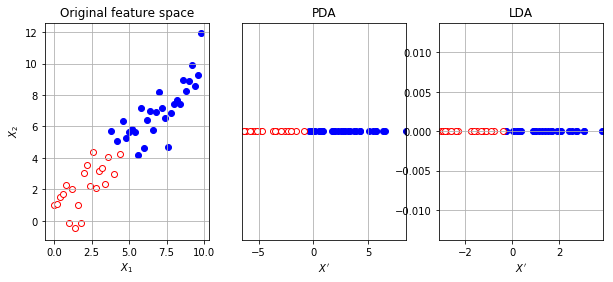

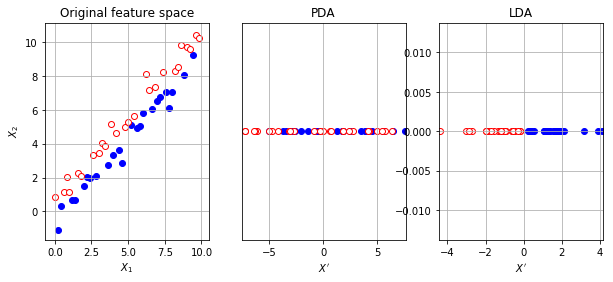

In [29]:
library("IRdisplay")
display_png(file="~/DimensionReduction/ex1.png")
display_png(file="~/DimensionReduction/ex2.png")

In [30]:
#I will make 10 plots with two variables grouped by income
#age, educational.num, capital.gain, capital.loss, hours.per.week

In [31]:
#install.packages("combinat")
library(combinat)
library(ggplot2)
order_adult<-c(1,5,11,12,13)
length_v<-combn(5, 2)
x1<-adult[,order_adult[length_v[1,1]]]
x2<-adult[,order_adult[length_v[2,1]]]


Attaching package: ‘combinat’

The following object is masked from ‘package:utils’:

    combn



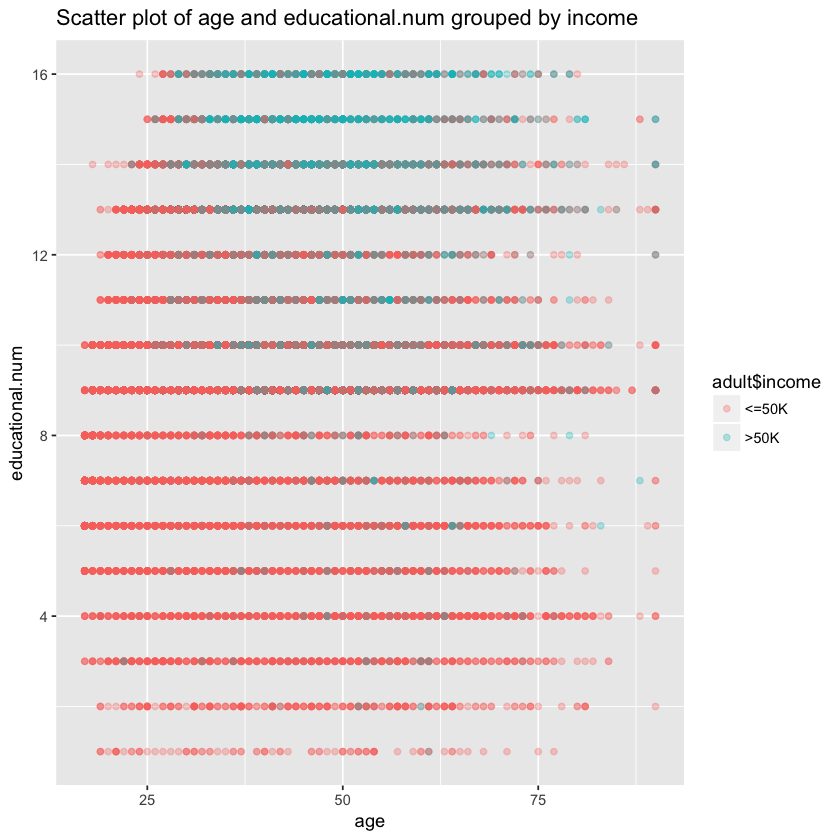

In [32]:
ggplot(data.frame(x1,x2),aes(x1,x2,group=adult$income,colour=adult$income))+
    geom_point(alpha = 0.3)+
   labs(x = "age", y = "educational.num", title = "Scatter plot of age and educational.num grouped by income")

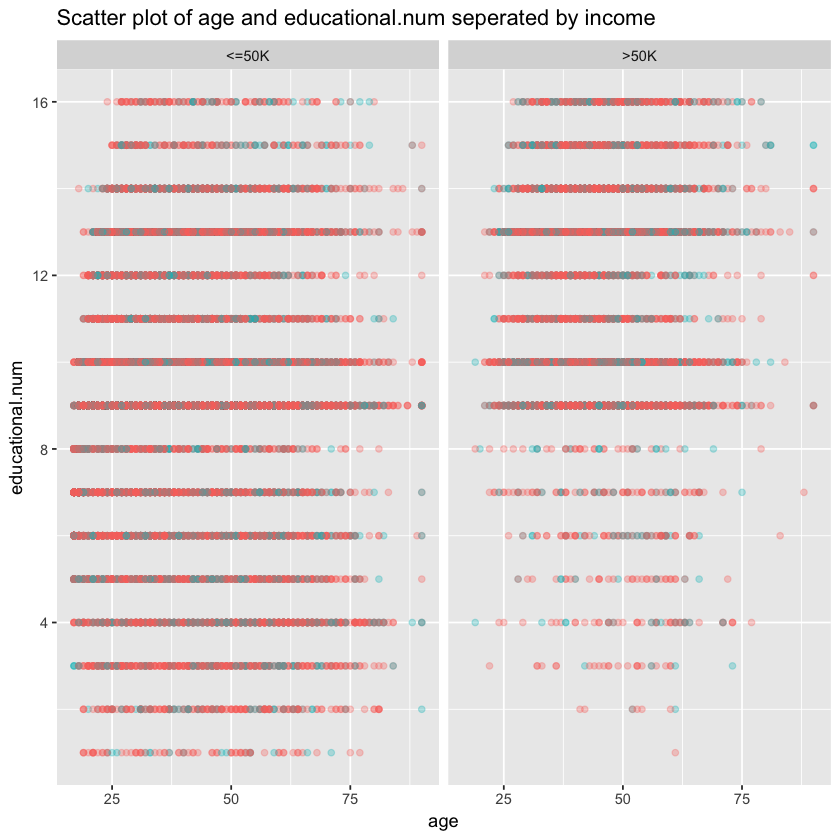

In [33]:
ggplot(data.frame(x1,x2),aes(x1,x2,group=adult$income,colour=adult$income))+
    geom_point(alpha = 0.3)+facet_wrap(~adult$income,ncol=2)+ theme(legend.position="none")+
   labs(x = "age", y = "educational.num", title = "Scatter plot of age and educational.num seperated by income")

### clustering

In [34]:
library(gridExtra)
library(grid)
library(ggplot2)

which factor variables is similar with result of clustering?

In [35]:
dist.adult<-dist(adult.norm,method="euclidean")

In [38]:
str(dist.adult)

Class 'dist'  atomic [1:1192746061] 1.47 1.96 2.08 1.51 1.11 ...
  ..- attr(*, "Size")= int 48842
  ..- attr(*, "Diag")= logi FALSE
  ..- attr(*, "Upper")= logi FALSE
  ..- attr(*, "method")= chr "euclidean"
  ..- attr(*, "call")= language dist(x = adult.norm, method = "euclidean")


In [ ]:
h.average<-hclust(dist.adult,method="average")

In [ ]:
capture.output(h.average,file="~/desktop/h_average.txt")

In [ ]:
png(width = 1000, height = 1000, filename = "h.clust.average.jpg", type = "cairo", antialias = "subpixel", 
    family = "malgun")
plot(h.average,hang=-1,main="average linkage")
dev.off()

In [ ]:
h.complete<-hclust(dist.adult,method="complete")

In [ ]:
write.csv(h.complete,"~/desktop/h_complete.csv")

In [ ]:
png(width = 1000, height = 1000, filename = "h.clust.complete.jpg", type = "cairo", antialias = "subpixel", 
    family = "malgun")
plot(h.complete,hang=-1,main="complete linkage")
dev.off()

In [ ]:
h.single<-hclust(dist.adult,method="single")

In [ ]:
write.csv(h.single,"~/desktop/h_single.csv")

In [ ]:
png(width = 1000, height = 1000, filename = "h.clust.single.jpg", type = "cairo", antialias = "subpixel", 
    family = "malgun")
plot(h.single,hang=-1,main="single linkage")
dev.off()

In [ ]:
hclust.result<-cutree(h.complete,h=5)

In [ ]:
table(hclust.result)

In [ ]:
adult$hclust1<-hclust.result

In [ ]:
summary(adult[adult$hclust1==1,])

In [ ]:
ggplot(adult, aes(x = age, color = gender, fill = gender)) +
   geom_density(alpha = 0.8) +
   labs(x = "age", y = "Density",
        subtitle = "Density plot")
# The Age variable has a wide range and variability. 
# The distribution and mean are quite different for income level <=50K and >50K, 
# implying that ‘age’ will be a good predictor of ‘incomelevel’

In [ ]:
plot.workclass<-ggplot(adult[adult$hclust1==1,],aes(workclass)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.marital.status<-ggplot(adult[adult$hclust1==1,],aes(marital.status)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.occupation<-ggplot(adult[adult$hclust1==1,],aes(occupation)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.relationship<-qplot(adult[adult$hclust1==1,]$relationship)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.gender<-qplot(adult[adult$hclust1==1,]$gender)
plot.race<-qplot(adult[adult$hclust1==1,]$race)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))

grid.arrange(plot.workclass,plot.marital.status,plot.occupation,plot.relationship,plot.gender,plot.race,ncol=3)

In [ ]:
summary(adult[adult$hclust1==2,])

In [ ]:
plot.workclass<-ggplot(adult[adult$hclust1==2,],aes(workclass)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.marital.status<-ggplot(adult[adult$hclust1==2,],aes(marital.status)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.occupation<-ggplot(adult[adult$hclust1==2,],aes(occupation)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.relationship<-qplot(adult[adult$hclust1==2,]$relationship)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.gender<-qplot(adult[adult$hclust1==2,]$gender)
plot.race<-qplot(adult[adult$hclust1==2,]$race)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))

grid.arrange(plot.workclass,plot.marital.status,plot.occupation,plot.relationship,plot.gender,plot.race,ncol=3)

In [ ]:
summary(adult[adult$hclust1==3,])

In [ ]:
plot.workclass<-ggplot(adult[adult$hclust1==3,],aes(workclass)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.marital.status<-ggplot(adult[adult$hclust1==3,],aes(marital.status)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.occupation<-ggplot(adult[adult$hclust1==3,],aes(occupation)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.relationship<-qplot(adult[adult$hclust1==3,]$relationship)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.gender<-qplot(adult[adult$hclust1==3,]$gender)
plot.race<-qplot(adult[adult$hclust1==3,]$race)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))

grid.arrange(plot.workclass,plot.marital.status,plot.occupation,plot.relationship,plot.gender,plot.race,ncol=3)

In [ ]:
adult[adult$hclust1==4,]

In [ ]:
adult[adult$hclust1==5,]

In [ ]:
#hclust는 별로 의미가 없다. 방법은 average이다. 다른 방법은 일단 keep (시간이 너무 오래 걸린다.)
#kmeans를 사용하자

In [ ]:
kmeans.util<-kmeans(cbind(adult[c(1,5,13)],scale(adult$capital.gain-adult$capital.loss)*8+10),5)

In [ ]:
str(kmeans.util)

In [ ]:
kmeans.util$centers
#클러스터링을 했는데 20,30,40대 이런식으로 분리됬자나아아 음? - 40대가 가장 돈이 많네 원래 40대가 돈이 많아 40-50대가 한창일때잖아

In [ ]:
table(kmeans.util$cluster)

In [ ]:
adult$kmeans1<-kmeans.util$cluster

In [ ]:
summary(adult[adult$kmeans==1,])

In [ ]:
plot.workclass<-ggplot(adult[adult$kmeans1==1,],aes(workclass)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.marital.status<-ggplot(adult[adult$kmeans1==1,],aes(marital.status)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.occupation<-ggplot(adult[adult$kmeans1==1,],aes(occupation)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.relationship<-qplot(adult[adult$kmeans1==1,]$relationship)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.gender<-qplot(adult[adult$kmeans1==1,]$gender)
plot.race<-qplot(adult[adult$kmeans1==1,]$race)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))

grid.arrange(plot.workclass,plot.marital.status,plot.occupation,plot.relationship,plot.gender,plot.race,ncol=3)

In [ ]:
summary(adult[adult$kmeans==2,])

In [ ]:
plot.workclass<-ggplot(adult[adult$kmeans1==2,],aes(workclass)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.marital.status<-ggplot(adult[adult$kmeans1==2,],aes(marital.status)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.occupation<-ggplot(adult[adult$kmeans1==2,],aes(occupation)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.relationship<-qplot(adult[adult$kmeans1==2,]$relationship)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.gender<-qplot(adult[adult$kmeans1==2,]$gender)
plot.race<-qplot(adult[adult$kmeans1==2,]$race)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))

grid.arrange(plot.workclass,plot.marital.status,plot.occupation,plot.relationship,plot.gender,plot.race,ncol=3)

In [ ]:
summary(adult[adult$kmeans==3,])

In [ ]:
plot.workclass<-ggplot(adult[adult$kmeans1==3,],aes(workclass)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.marital.status<-ggplot(adult[adult$kmeans1==3,],aes(marital.status)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.occupation<-ggplot(adult[adult$kmeans1==3,],aes(occupation)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.relationship<-qplot(adult[adult$kmeans1==3,]$relationship)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.gender<-qplot(adult[adult$kmeans1==3,]$gender)
plot.race<-qplot(adult[adult$kmeans1==3,]$race)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))

grid.arrange(plot.workclass,plot.marital.status,plot.occupation,plot.relationship,plot.gender,plot.race,ncol=3)

In [ ]:
summary(adult[adult$kmeans==4,])

In [ ]:
plot.workclass<-ggplot(adult[adult$kmeans1==4,],aes(workclass)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.marital.status<-ggplot(adult[adult$kmeans1==4,],aes(marital.status)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.occupation<-ggplot(adult[adult$kmeans1==4,],aes(occupation)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.relationship<-qplot(adult[adult$kmeans1==4,]$relationship)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.gender<-qplot(adult[adult$kmeans1==4,]$gender)
plot.race<-qplot(adult[adult$kmeans1==4,]$race)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))

grid.arrange(plot.workclass,plot.marital.status,plot.occupation,plot.relationship,plot.gender,plot.race,ncol=3)

In [ ]:
summary(adult[adult$kmeans==5,])

In [ ]:
plot.workclass<-ggplot(adult[adult$kmeans1==5,],aes(workclass)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.marital.status<-ggplot(adult[adult$kmeans1==5,],aes(marital.status)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.occupation<-ggplot(adult[adult$kmeans1==5,],aes(occupation)) +
    geom_bar() +
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.relationship<-qplot(adult[adult$kmeans1==5,]$relationship)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))
plot.gender<-qplot(adult[adult$kmeans1==5,]$gender)
plot.race<-qplot(adult[adult$kmeans1==5,]$race)+
    theme(axis.text.x=element_text(angle=90,hjust=0.5,vjust=0.5))

grid.arrange(plot.workclass,plot.marital.status,plot.occupation,plot.relationship,plot.gender,plot.race,ncol=3)